<a href="https://colab.research.google.com/github/Pxon03/LabCSD2301/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import datetime
import urllib.request
import csv
import seaborn as sns



In [74]:
import matplotlib as mpl
mpl.__version__

'3.7.1'

In [75]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2023-11-06 12:35:59--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-11-06 12:35:59--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2023-11-06 12:35:59 (3.57 MB/s) - ‘t

In [53]:
df = pd.concat(pd.read_excel('data_durian.xlsx', sheet_name=None,skiprows=[1]))
df


สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน  ผลผลิต(ตัน)  สัดส่วน  \
ปี2557 0                                        จังหวัด  ผลผลิต(ตัน)  สัดส่วน   
       1                                       จันทบุรี       242686   0.3841   
       2                                          ชุมพร       130918   0.2072   
       3                                          ระยอง        75731   0.1199   
       4                                  นครศรีธรรมราช        33133   0.0524   
...                                                 ...          ...      ...   
ปี2562 28                                    นครราชสีมา          188   0.0002   
       29                                   อุบลราชธานี          185   0.0002   
       30                                        ชลบุรี          156   0.0002   
       31                                       นนทบุรี            8        0   
       32                                     กาฬสินธุ์            3        0   

           เนื้อที่เก็บเกี่ยว(ไร่)  ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
ปี2557 0   เนื้อที่เก็บเกี่ยว(ไร่)  ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
       1                    167504                           1448.84  
       2                    107222                              1221  
       3                     54840                           1380.94  
       4                     38298                            865.14  
...                            ...                               ...  
ปี2562 28                      499                            376.75  
       29                      270                            685.19  
       30                      216                            722.22  
       31                      114                             70.18  
       32                        3                              1000  

[190 rows x 5 columns]

In [54]:
df_durian = pd.concat(pd.read_excel('data_durian.xlsx', sheet_name=None))

In [55]:
# ตรวจสอบรายชื่อ column
df_durian.columns

Index(['สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน', 'ผลผลิต(ตัน)',
       'สัดส่วน', 'เนื้อที่เก็บเกี่ยว(ไร่)',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'],
      dtype='object')

In [56]:
#ตรวจสอบค่าว่าง
df.isnull().values.any()

False

In [57]:
#ดูค่าสถิติ
df.describe()

,สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
count,190,190,190.0000,190,190
unique,33,176,110.0000,181,183
top,จังหวัด,ผลผลิต(ตัน),0.0002,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
freq,6,6,12.0000,6,6


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 190 entries, ('ปี2557', 0) to ('ปี2562', 32)
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน  190 non-null    object
 1   ผลผลิต(ตัน)                                    190 non-null    object
 2   สัดส่วน                                        190 non-null    object
 3   เนื้อที่เก็บเกี่ยว(ไร่)                        190 non-null    object
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)               190 non-null    object
dtypes: object(5)
memory usage: 9.3+ KB


In [69]:
df['ผลผลิต(ตัน)'] = pd.to_numeric(df['ผลผลิต(ตัน)'], errors='coerce')
df['สัดส่วน'] = pd.to_numeric(df['สัดส่วน'], errors='coerce')
df['เนื้อที่เก็บเกี่ยว(ไร่)'] = pd.to_numeric(df['เนื้อที่เก็บเกี่ยว(ไร่)'], errors='coerce')
df['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'] = pd.to_numeric(df['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 190 entries, ('ปี2557', 0) to ('ปี2562', 32)
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน  190 non-null    object 
 1   ผลผลิต(ตัน)                                    184 non-null    float64
 2   สัดส่วน                                        184 non-null    float64
 3   เนื้อที่เก็บเกี่ยว(ไร่)                        184 non-null    float64
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)               184 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.3+ KB


In [71]:
df.shape

(190, 5)

In [72]:
df.describe()

,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
count,184.000000,184.000000,184.000000,184.000000
mean,22371.396739,0.032607,20661.657609,699.471087
std,54036.298374,0.077566,38780.525104,400.451057
min,1.000000,0.000000,2.000000,5.180000
25%,326.750000,0.000475,668.750000,399.605000
50%,1987.000000,0.002900,3462.000000,646.105000
75%,18710.000000,0.027325,26316.250000,935.830000
max,339292.000000,0.430500,190728.000000,1842.800000


<Axes: >

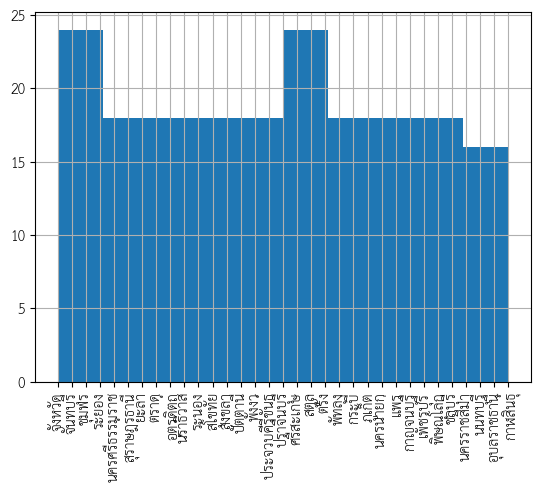

In [77]:
df['สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน'].hist(xrot=90)

In [78]:
df.drop_duplicates(keep=False, inplace=True)
print('duplicated: %s'%(df.duplicated(keep=False).sum()))

duplicated: 0


In [79]:
def remove_outliers(var):
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return var[(var >= lower) & (var <= upper)]

df['เนื้อที่เก็บเกี่ยว(ไร่)'] = remove_outliers(df['เนื้อที่เก็บเกี่ยว(ไร่)'])

<Axes: >

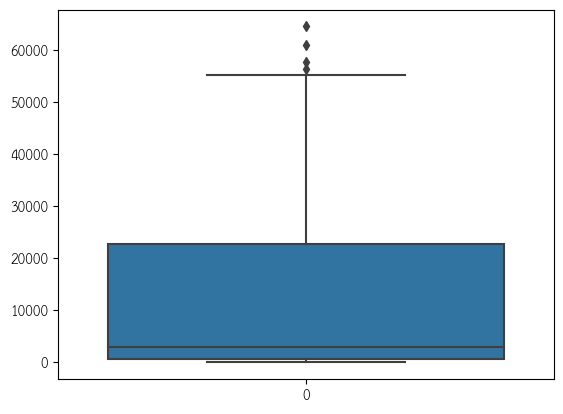

In [82]:
sns.boxplot(df['เนื้อที่เก็บเกี่ยว(ไร่)'])

<Axes: >

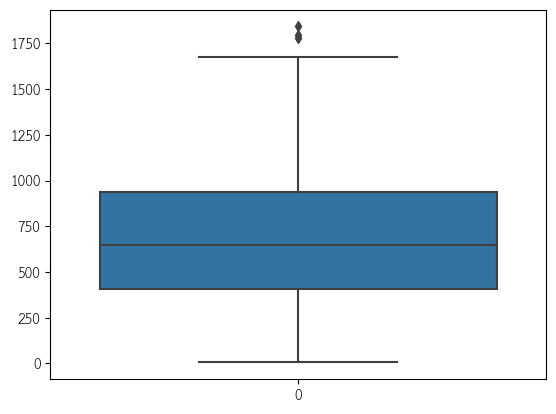

In [86]:
sns.boxplot(df['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'])

In [87]:
df.isnull().sum(axis=0)

สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรทุเรียน     0
ผลผลิต(ตัน)                                       0
สัดส่วน                                           0
เนื้อที่เก็บเกี่ยว(ไร่)                          12
ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)                  0
dtype: int64